# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откроем файл с данными и изучим общую информацию. 

In [1]:
#откроем файл и посмотрим первые 10 строк, импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
data = pd.read_csv('/datasets/spb.csv', sep='\t')
pd.set_option('display.max_columns', None)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
#выведем общую информацию
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

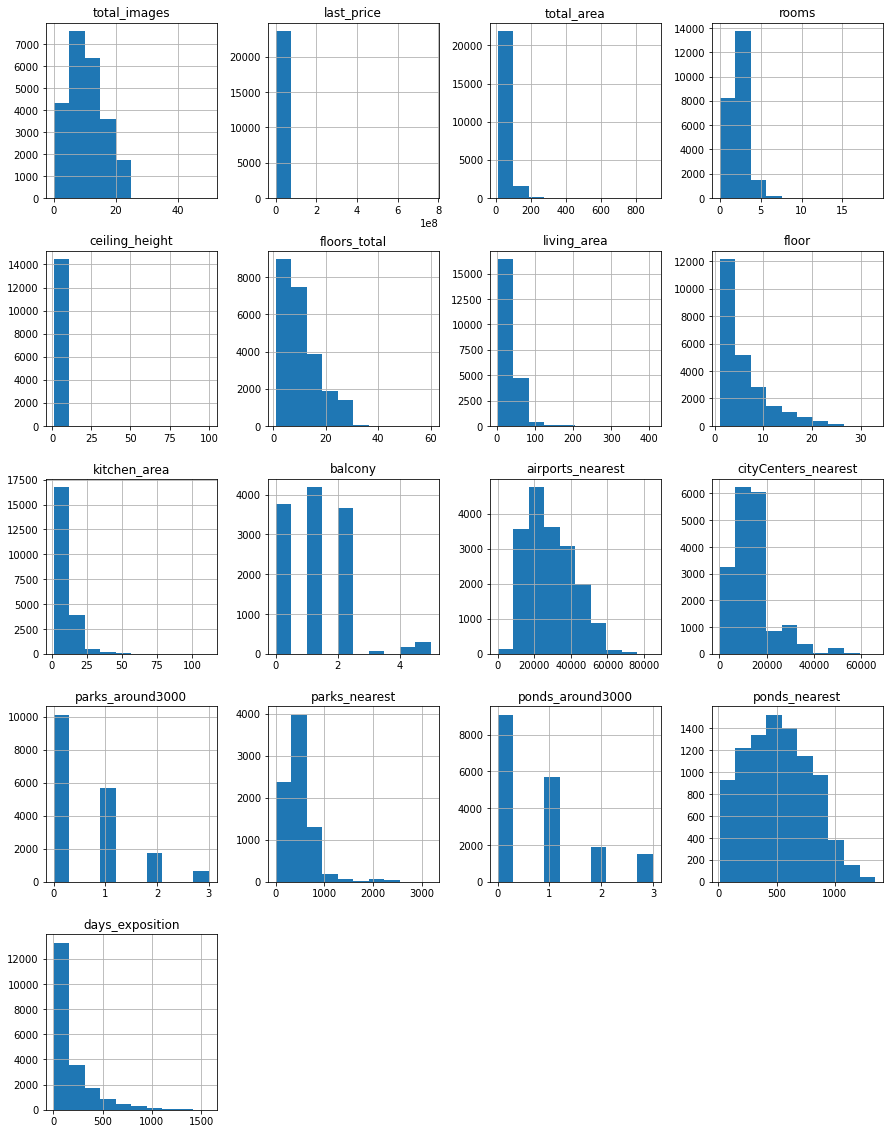

In [3]:
data.hist(figsize=(15, 20));

Всего у нас 23699 записи. В общей информации о данных можно увидеть очень много NaN в таблице,есть проблемы с типами данных.По ряду признаков есть аномальные значения. В дальнейшем будем смотреть, что можно исправить.

### Предобработка данных

Приступим к обработке данных. Для начала приведем в порядок названия столбцов.

In [4]:
data = data.rename(columns={'studio':'is_studio',
                            'cityCenters_nearest':'city_centers_nearest',
                            'parks_around3000':'parks_around_3000',
                            'ponds_around3000':'ponds_around_3000'
                           })
#проверим переименование стобцов
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'is_studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Для того чтобы с таблицей было удобно работать, лучше поменять положение столбцов.

In [5]:
data = data[[
 'locality_name',  
 'total_area',
 'living_area',
 'kitchen_area',
 'rooms',
 'balcony',
 'floor',
 'ceiling_height',  
 'floors_total',
 'open_plan',
 'is_apartment',
 'is_studio',
 'total_images',
 'last_price',
 'first_day_exposition',
 'days_exposition',
 'city_centers_nearest',
 'airports_nearest',
 'parks_around_3000',
 'parks_nearest',
 'ponds_around_3000',
 'ponds_nearest'
]]
data.sample(10)

,locality_name,total_area,living_area,kitchen_area,rooms,balcony,floor,ceiling_height,floors_total,open_plan,is_apartment,is_studio,total_images,last_price,first_day_exposition,days_exposition,city_centers_nearest,airports_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest
21424,Санкт-Петербург,118.9,82.4,11.5,4,NaN,2,3.40,6.0,False,NaN,False,13,21000000.0,2017-11-27T00:00:00,13.0,4950.0,26248.0,3.0,330.0,1.0,181.0
5247,посёлок Парголово,40.0,16.7,10.0,1,NaN,14,NaN,26.0,False,NaN,False,11,3300000.0,2018-01-09T00:00:00,84.0,18006.0,53791.0,1.0,733.0,3.0,865.0
11226,Санкт-Петербург,98.0,57.3,15.9,4,NaN,2,3.50,6.0,False,NaN,False,2,9200000.0,2018-11-15T00:00:00,10.0,4194.0,31215.0,1.0,83.0,3.0,498.0
5734,посёлок Парголово,41.0,18.0,10.9,1,2.0,18,NaN,24.0,False,NaN,False,9,3650000.0,2018-08-05T00:00:00,45.0,19501.0,53325.0,0.0,NaN,1.0,654.0
10866,Санкт-Петербург,58.0,39.5,6.5,3,1.0,7,2.55,9.0,False,NaN,False,10,4250000.0,2018-04-02T00:00:00,92.0,15618.0,21324.0,0.0,NaN,2.0,545.0
1417,Санкт-Петербург,41.8,18.6,7.7,1,NaN,18,NaN,23.0,False,NaN,False,0,6200000.0,2018-07-23T00:00:00,10.0,13145.0,43269.0,1.0,417.0,0.0,NaN
9362,Санкт-Петербург,108.0,39.0,36.0,3,1.0,5,2.70,17.0,False,NaN,False,19,11990000.0,2017-09-03T00:00:00,32.0,12665.0,14741.0,0.0,NaN,0.0,NaN
19913,Санкт-Петербург,79.0,41.9,18.0,2,2.0,9,3.00,23.0,False,NaN,False,7,10260000.0,2017-01-31T00:00:00,NaN,12398.0,40584.0,3.0,447.0,0.0,NaN
13147,Санкт-Петербург,41.9,29.9,5.1,3,NaN,2,2.50,5.0,False,NaN,False,12,4000000.0,2017-11-23T00:00:00,294.0,11670.0,10429.0,0.0,NaN,1.0,920.0
5289,Санкт-Петербург,49.0,NaN,NaN,2,NaN,2,2.70,4.0,False,NaN,False,20,4960000.0,2017-03-22T00:00:00,516.0,6177.0,21341.0,2.0,341.0,1.0,325.0


In [6]:
#проверим есть ли дубликаты
data.duplicated().sum()

0

In [7]:
#подсчитаем пропуски
data.isna().sum().sort_values()

open_plan                   0
total_area                  0
first_day_exposition        0
last_price                  0
rooms                       0
total_images                0
floor                       0
is_studio                   0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
ponds_around_3000        5518
parks_around_3000        5518
city_centers_nearest     5519
airports_nearest         5542
ceiling_height           9195
balcony                 11519
ponds_nearest           14589
parks_nearest           15620
is_apartment            20924
dtype: int64

Пропуски отмечены в 14 столбцах из 22. Пропуски могут появиться от того, что не все поля обязательны для заполнения поэтому их оставили просто пустыми. Очень много пропусков в столбцах с расстоянием до города, до парка, до водоема, я думаю это связано с тем, что люди не заполнили эти строки, потому что просто не знали этих данных или посчитали их не такими важными.
Для некоторых пропущенных значений можно предположить логичную замену. Например, если человек не указал число балконов — скорее всего, в квартире их нет. Такие пропуски можно заменить на 0.

In [8]:
#заменим пропуски в столбце "balcony"
data['balcony'] = data['balcony'].fillna(0)
#сразу изменим тип данных на int
data['balcony'] = data['balcony'].astype('int')

Очень много пропусков в столбце 'ceiling_height' - высота потолков.

In [9]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Разброс значений не большой, но есть и аномальные значения, как потолок 100 м. Заполним средним значением, так как в большинстве квартир высота потолков стандартная.

In [10]:
#заменим пропуски на медианное значение
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)
#проверим пропуски
data['ceiling_height'].isna().sum()

0

In [11]:
#заменим пропуски в столбце "is_apartment" на False 
data['is_apartment'] = data['is_apartment'].fillna(value=False)
#удалим строки без города, такие обьявления не информативны
data = data.dropna(subset=['locality_name'])

In [12]:
#заменим пропуски в living_area и в kitchen_area. Думаю, что жилая площадь и площадь кухни связаны с общей площадью, 
#поэтому посчитаем  в среднем долю жилой площади и кухни от общей площади. 
#Зная, общую площадь, долю площади кухни и долю жилой площади можно найти вероятную площадь кухни и жилой площади
mean_living_area = data['living_area'].mean()/data['total_area'].mean()
mean_kitchen_area = data['kitchen_area'].mean()/data['total_area'].mean()
data['living_area'].fillna(mean_living_area*data['total_area'],inplace=True)
data['kitchen_area'].fillna(mean_kitchen_area*data['total_area'],inplace=True)

Не для всех пропусков можно найти логичную замену, оставим эти значения пустыми. Пропуски — тоже важный сигнал, который нужно учитывать. 
Далее рассмотрим типы данных в столбцах и если это будет необходимо, изменим их. 

In [13]:
#first_day_exposition - тип данных object, изменим на  datetime
data['first_day_exposition']= pd.to_datetime(data['first_day_exposition'],format ='%Y-%m-%dT%H:%M:%S')
#изменим last_price на целочисленный тип, так как копейки в цене не нужны
data['last_price'] = data['last_price'].astype('int')

Перейдем к устранению неявных дубликатов. Посмотрим на уникальные значения в столбце с названиями.

In [14]:
data['locality_name'].unique()
#для начала заменим букву ё на е
data['locality_name'] = data['locality_name'].str.replace('ё','е', regex=True)
# далее изменим все обозначения одного и того же типа населенного пункта
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа','поселок', regex=True)
data['locality_name'] = data['locality_name'].str.replace('городской поселок','поселок', regex=True)
data['locality_name'] = data['locality_name'].str.replace('поселок станции','поселок', regex=True)

In [15]:
data['ceiling_height'].unique()
# в столбце 'ceiling_height' встречаются аномальные значения, высота потолков- 25,32,27 метров. Заменим их.
for i in data['ceiling_height']:
    if i >= 10:
         data['ceiling_height'] = data['ceiling_height'].replace({i: i/10})

In [16]:
#проверим изменилась ли высота потолков
data['ceiling_height'].unique()

array([ 2.7 ,  2.65,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  3.2 ,  2.61,  3.25,  3.45,  2.77,
        2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,  2.47,
        2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,  2.51,
        2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,  2.59,
        2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,  3.55,
        3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,  5.  ,
        2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,  4.7 ,
        2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,  2.3 ,
        3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,  3.95,
        3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,  3.24,
        4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,  3.09,
        8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,  2.68,
        3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,  3.32,
        1.2 ,  8.3 ,

In [17]:
#посмотрим на стобец rooms 
data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

In [18]:
#удалим квартиры с большим количеством комнат(больше 10)
data = data[data['rooms']<10]
data['rooms'].unique()

array([3, 1, 2, 4, 5, 6, 0, 7, 8, 9])

In [19]:
#отобразим конечный результат предообработки
data.isna().sum().sort_values()

locality_name               0
first_day_exposition        0
last_price                  0
total_images                0
is_studio                   0
open_plan                   0
ceiling_height              0
is_apartment                0
balcony                     0
rooms                       0
kitchen_area                0
living_area                 0
total_area                  0
floor                       0
floors_total               85
days_exposition          3178
ponds_around_3000        5510
parks_around_3000        5510
city_centers_nearest     5511
airports_nearest         5534
ponds_nearest           14561
parks_nearest           15582
dtype: int64

Для работы с таблицей мы заменили названия столбцов, поменяли их местами. Убрали дубликаты в столбце с названиями населенных пунктов,также убрали аномальные значения в некоторых столбцах, частично заполнили пропуски в данных, это в далнейшем упростит анализ.

### Посчитаем и добавим в таблицу новые столбцы

Добавим в таблицу новые столбцы со следующими параметрами:
цена одного квадратного метра;
день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
месяц публикации объявления;
год публикации объявления;
тип этажа квартиры (значения — «‎первый», «последний», «другой»);
расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [20]:
# посчитаем и создадим столбец цена одного квадратного метра
data['price_km'] = data['last_price']/data['total_area']
# создадим столбцы день недели,месяц,год публикации объявления
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

In [21]:
#разобьем по категориям этаж квартиры(первый,последний, другой)
def categorize_floor(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'
data['floor_category'] = data.apply(categorize_floor,axis=1)       

In [22]:
#создадим столбец расстояние до центра города в километрах
data['city_centers_km'] = data['city_centers_nearest']/1000
data['city_centers_km'] = round(data['city_centers_km'],0)

### Исследовательский анализ данных

Изучим следующие параметры объектов:
общая площадь;
жилая площадь;
площадь кухни;
цена объекта;
количество комнат;
высота потолков;
этаж квартиры;
тип этажа квартиры («первый», «последний», «другой»);
общее количество этажей в доме;
расстояние до центра города в метрах;
расстояние до ближайшего аэропорта;
расстояние до ближайшего парка;
день и месяц публикации объявления.
А также построим отдельные гистограммы для каждого из параметров.

In [23]:
data[['total_area','living_area','kitchen_area','last_price','rooms','ceiling_height','floor','floor_category','floors_total','city_centers_nearest','airports_nearest','parks_nearest','weekday','month']].describe()

,total_area,living_area,kitchen_area,last_price,rooms,ceiling_height,floor,floors_total,city_centers_nearest,airports_nearest,parks_nearest,weekday,month
count,23639.000000,23639.000000,23639.000000,2.363900e+04,23639.000000,23639.000000,23639.000000,23554.000000,18128.000000,18105.000000,8057.000000,23639.000000,23639.000000
mean,60.192182,34.496224,10.491311,6.513357e+06,2.065062,2.697496,5.893312,10.677507,14203.362092,28806.155869,490.837036,2.568679,6.401963
std,34.824049,21.905932,5.970389,1.054652e+07,1.051470,0.237387,4.882531,6.594773,8606.224819,12639.588433,342.657345,1.788720,3.491293
min,12.000000,2.000000,1.300000,1.219000e+04,0.000000,1.000000,1.000000,1.000000,181.000000,0.000000,1.000000,0.000000,1.000000
25%,40.000000,19.000000,7.000000,3.400000e+06,1.000000,2.600000,2.000000,5.000000,9256.250000,18574.000000,288.000000,1.000000,3.000000
50%,52.000000,30.000000,9.000000,4.646000e+06,2.000000,2.650000,4.000000,9.000000,13107.000000,26758.000000,454.000000,3.000000,6.000000
75%,69.700000,42.100000,12.000000,6.790000e+06,3.000000,2.700000,8.000000,16.000000,16293.000000,37310.000000,612.000000,4.000000,10.000000
max,631.200000,360.305780,107.000000,7.630000e+08,9.000000,10.000000,33.000000,60.000000,65968.000000,84869.000000,3190.000000,6.000000,12.000000


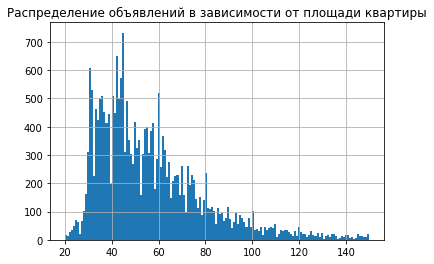

In [24]:
data.hist('total_area',bins=150,range=(20,150));
plt.title('Распределение объявлений в зависимости от площади квартиры');

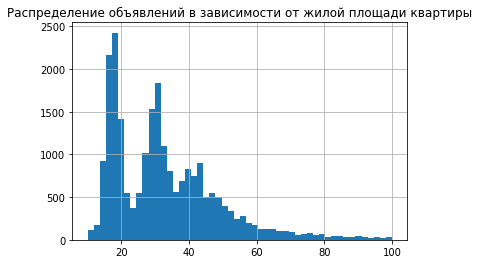

In [25]:
data.hist('living_area',bins=50,range=(10,100));
plt.title('Распределение объявлений в зависимости от жилой площади квартиры');

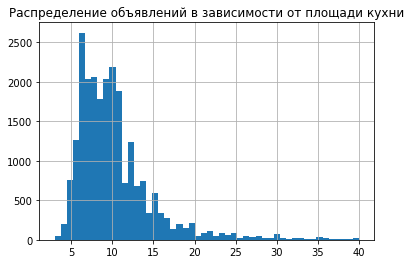

In [26]:
data.hist('kitchen_area',bins=50,range=(3,40));
plt.title('Распределение объявлений в зависимости от площади кухни');

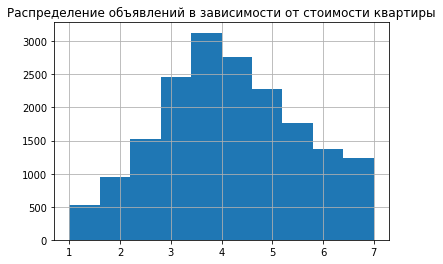

In [27]:
data['last_price_mln'] = data['last_price'] / 1000000
data.hist('last_price_mln',bins=10,range=(1,7));
plt.title('Распределение объявлений в зависимости от стоимости квартиры');

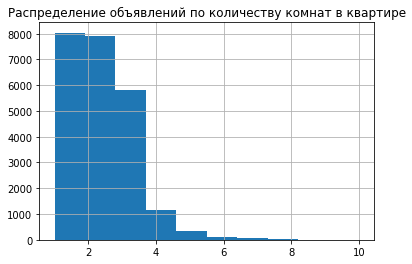

In [28]:
data.hist('rooms',bins=10,range=(1,10));
plt.title('Распределение объявлений по количеству комнат в квартире');

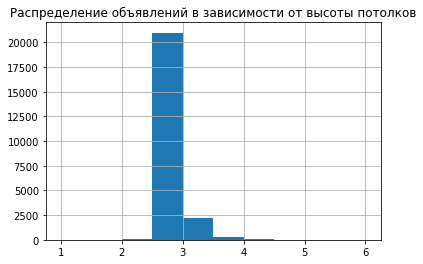

In [29]:
data.hist('ceiling_height',bins=10,range=(1,6));
plt.title('Распределение объявлений в зависимости от высоты потолков');

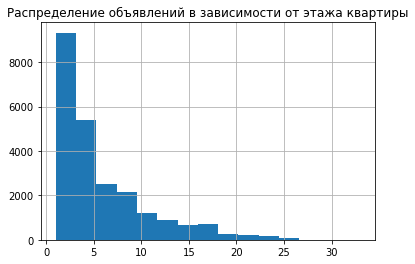

In [30]:
data.hist('floor',bins=15,range=(1,33));
plt.title('Распределение объявлений в зависимости от этажа квартиры');

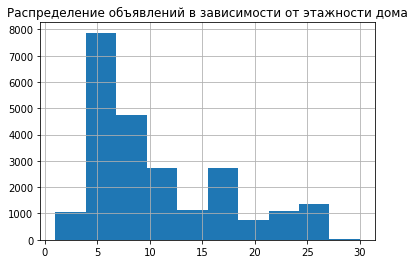

In [31]:
data.hist('floors_total',bins=10,range=(1,30));
plt.title('Распределение объявлений в зависимости от этажности дома');

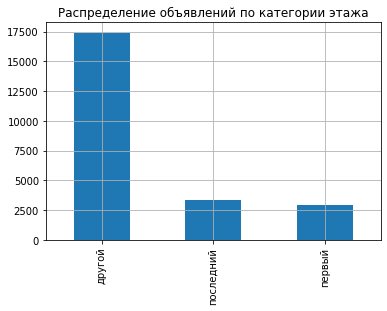

In [32]:
data['floor_category'].value_counts().plot(kind='bar',grid=True,style='o-');
plt.title('Распределение объявлений по категории этажа');

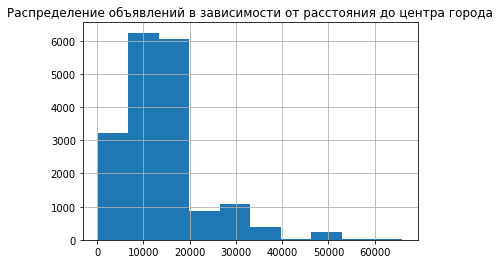

In [33]:
data.hist('city_centers_nearest',bins=10,range=(180,66000));
plt.title('Распределение объявлений в зависимости от расстояния до центра города');

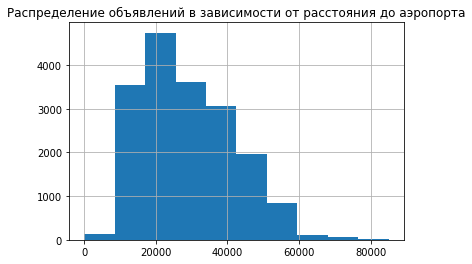

In [34]:
data.hist('airports_nearest',bins=10,range=(0,85000));
plt.title('Распределение объявлений в зависимости от расстояния до аэропорта');

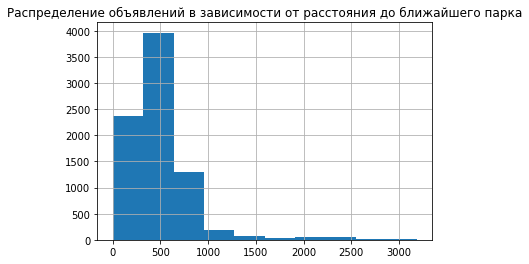

In [35]:
data.hist('parks_nearest',bins=10,range=(0,3190));
plt.title('Распределение объявлений в зависимости от расстояния до ближайшего парка');

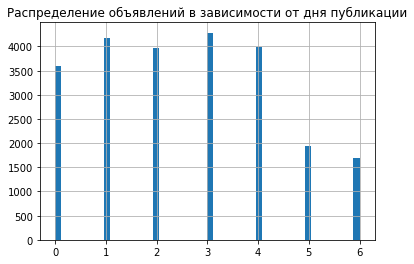

In [36]:
data.hist('weekday',bins=50,range=(0,6));
plt.title('Распределение объявлений в зависимости от дня публикации');

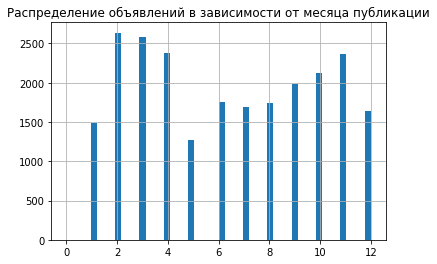

In [37]:
data.hist('month',bins=50,range=(0,12));
plt.title('Распределение объявлений в зависимости от месяца публикации');

Изучив данные и гистограммы, можно сделать следующие выводы.
Основная масса объявлений с квартирами от 30 до 70 кв.м. Рассматривая график распределения частоты объявлений от размеры жилой площади, видим два пика (самые популярные наиболее встречающиеся варианты обявлений) - около 18 кв.м, 30 кв.м и 40 кв.м. В целом основная масса объявлений имеет варианты жилой площади от 10 до 50 метров. Размер кухни от 7 до 12 кв.м. Большая часть квартир находится в диапазоне от 3 до 5 млн. рублей. Чаще всего объявления с о продаже одно- двух- и трехкомнатных квартир. Объявления с большим количеством комнат встречаются значительно реже. Большинство вариантов имеют высоту потолков от 2 до 3 метров. Чаще встречаются объявления с квартирами с 1 по 5 этаж. Это соответствует частоте выборки по этажности домов где 5 чаще всего встречаются дома 5 этажей, 9 и 16 - классические постройки. Больше всего объявлений с квартирами не на первом и не на последнем этажах. Основная масса объявлений о квартирах в пределах 2 км от центра города и от 2 до 5 км от аэропорта. В выходные объявление выставляются значительно (порядка в два раза) реже чем в любой рабочий день с понедельника по пятницу. Анализирую график частоты публикации объявлений по месяцев наблюдаем сезонность, так наблюдаются пики в феврале, марте и апреле - предвещая спад летом и далее второй нарастающий пик уже осенью сентябрь, октябрь, ноябрь.


In [38]:
#Изучим,как быстро продавались квартиры (столбец days_exposition).
data[['days_exposition']].describe()

,days_exposition
count,20461.000000
mean,180.685450
std,219.610102
min,1.000000
25%,45.000000
50%,95.000000
75%,231.000000
max,1580.000000


In [39]:
round(data['days_exposition'].mean())

181

In [40]:
round(data['days_exposition'].median())

95

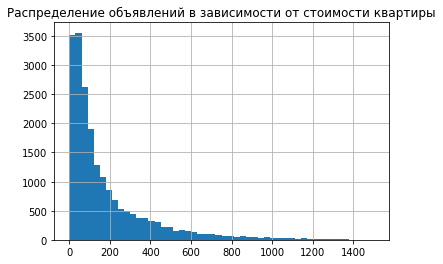

In [41]:
data.hist('days_exposition',bins=50,range=(0,1500));
plt.title('Распределение объявлений в зависимости от стоимости квартиры');

Медианное время продажи квартиры - 95 дня, среднее значение 181 дней. 25% всех квартир продается в течении 45 дней - будем считать это быстрой продажей. Следующие 50% квартир продаются от 45 до 95 дней что будем считать обычной длительностью продажи. Оставшиейся 25% продаются от 231 дня - будем считать долгой продажей.

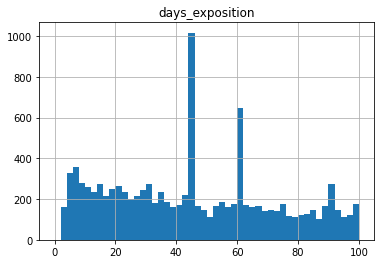

In [42]:
#посмотрим на диапазон публикаций от 0 до 100 дней
data.query('days_exposition <=100').hist('days_exposition',bins=50,range=(0,100));

Из графика видим два пика когда снимаются объявления - 45 и 60 дней соотвественно - это может быть связано с работой платформы объявлений. Либо заканчивается период публикации либо объявление падает в списке очень далеко и начинает быть редко просматриваемым. Как следствие продавец может снять старое объявление и подать новое тем самым повысив его просматриваемость.

Какие факторы больше всего влияют на общую (полную) стоимость объекта? Для этого изучим, зависит ли цена от:
общей площади;
жилой площади;
площади кухни;
количества комнат;
этажа, на котором расположена квартира (первый, последний, другой);
даты размещения (день недели, месяц, год).


,last_price
total_area,
12.0,2400000.0
13.0,2350000.0
13.2,1686000.0
14.0,1190000.0
15.0,1725000.0
...,...
507.0,84000000.0
517.0,50000000.0
618.0,300000000.0


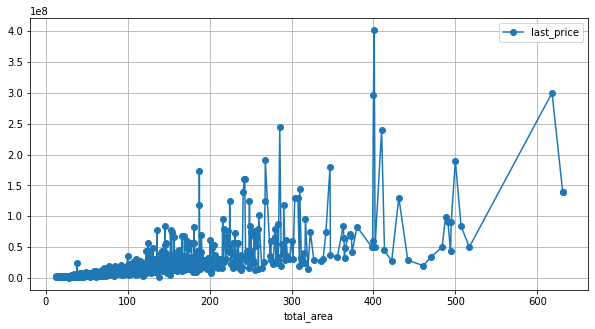

In [43]:
#Изучим зависимость цены от общей площади квартиры, для этого создадим сводную таблицу.
data.pivot_table(index='total_area',values='last_price').plot(grid=True,style='o-',figsize=(10,5))
data.pivot_table(index='total_area',values='last_price')

In [44]:
data['total_area'].corr(data['last_price'])

0.6438473696701817

Из графика выше видно, что зависимость цены квартиры от ее площади линейна в диапазоне до 400 кв м, процент корреляции высокий. 

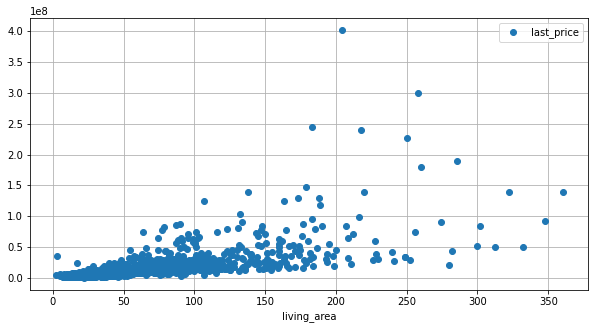

In [45]:
#Изучим зависимость цены от жилой площади квартиры, для этого создадим сводную таблицу.
data.pivot_table(index='living_area',values='last_price').plot(grid=True,style='o',figsize=(10,5));


Аналогично предыдущей зависимости (цена - общая площадь), чем больше жилая площадь, тем выше цена. Квартиры с жилой площадью более 200 кв м имееют уже менее слабую зависимость цены от жилой площади.

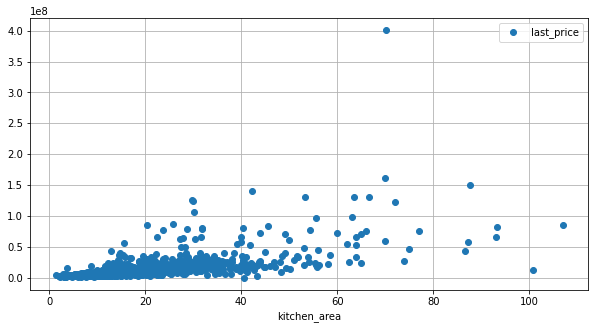

In [46]:
#Изучим зависимость цены от площади кухни, для этого создадим сводную таблицу.
data.pivot_table(index='kitchen_area',values='last_price').plot(grid=True,style='o',figsize=(10,5));

Аналогично двум предыдущим графикам зависимости цены от площади, чем больше площадь кухни, тем выше цена.

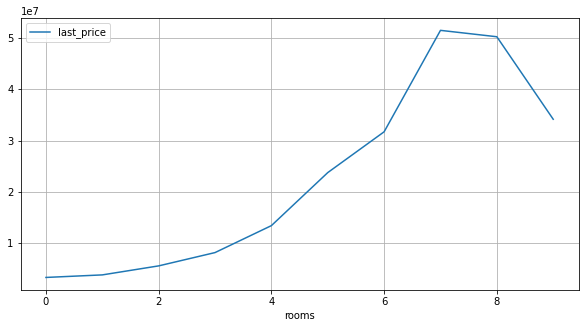

In [47]:
#Изучим зависимость цены от количества комнат, для этого создадим сводную таблицу. Для расчета возьмем квартиры с комнатами  
data.pivot_table(index='rooms',values='last_price').plot(grid=True,style='-',figsize=(10,5));

Очевидно, чем больше комнат, тем выше цена. Из графика видно, что цена сильнее всего растет при увеличении комнат с 3 до 4 и с 4 до 6.

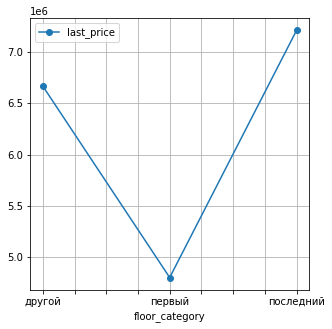

In [48]:
#Изучим зависимость цены от этажности, для этого создадим сводную таблицу.
data.pivot_table(index='floor_category',values='last_price').plot(grid=True,style='o-',figsize=(5,5));

Из графика видно, что квартиры на первом этаже самые дешевые.

Посмотрим на зависимость цены от дня, месяца и года публикации.

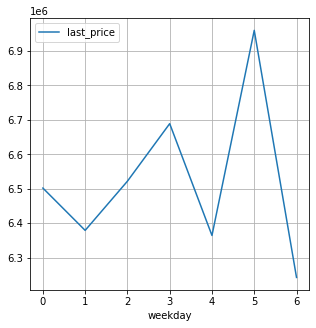

In [49]:
#Изучим зависимость цены от дня публикации квартиры, для этого создадим сводную таблицу.
data.pivot_table(index='weekday',values='last_price').plot(grid=True,style='-',figsize=(5,5));

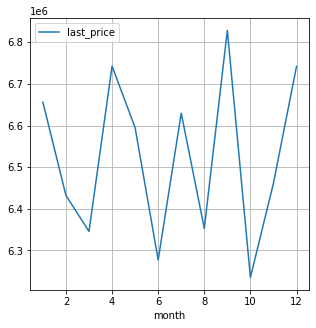

In [50]:
#Изучим зависимость цены от месяца публикации квартиры, для этого создадим сводную таблицу.
data.pivot_table(index='month',values='last_price').plot(grid=True,style='-',figsize=(5,5));

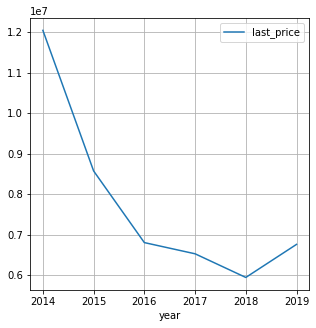

In [51]:
#Изучим зависимость цены от года публикации квартиры, для этого создадим сводную таблицу.
data.pivot_table(index='year',values='last_price').plot(grid=True,style='-',figsize=(5,5));

День недели: дороже всего квартиры, опубликованные в субботу, дешевле всего - в воскресенье.
Месяц: дороже всего квартиры, продающиеся в апреле и сентябре, дешевле всего - летом. На рынке недвижимости, как и во многих других сферах присутствует сезонность - в начале лета мы видим наименьшее предложение по стоимости недвижимости.
Год: квартиры очень сильно подешевели в 2016-2018 годах, но в 2019 году цены снова стали повышаться.

Далее посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. 

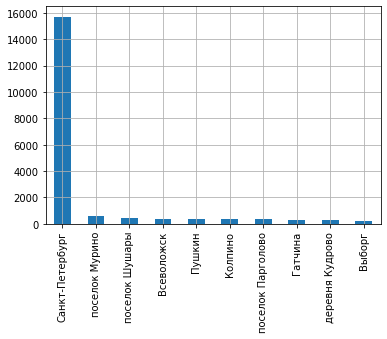

In [52]:
data_ten = data['locality_name'].value_counts().head(10)
data_ten.plot(kind='bar',grid=True,style='o-');

In [53]:
data_ten_price_metr = data.query('locality_name in @data_ten.index').pivot_table(index='locality_name',values='price_km',aggfunc='mean')
data_ten_price_metr.sort_values(by='price_km',ascending=False)

,price_km
locality_name,
Санкт-Петербург,114833.088420
Пушкин,103125.819291
деревня Кудрово,92473.547576
поселок Парголово,90175.913458
поселок Мурино,85681.762601
поселок Шушары,78677.364217
Колпино,75424.579098
Гатчина,68746.146763
Всеволожск,68654.473986


Cамая высокая стоимость квадратного метра  из 10 населённых пунктов с самым большим количеством объявлений в Санкт-Петербурге, тогда как самая низкая стоимость в Выборге.

Теперь выделим квартиры только в Санкт-Петербурге и вычислим среднюю цену каждого километра. Проанализируем, как стоимость объектов зависит от расстояния до центра города.

In [54]:
#выделим квартиры в Санкт-Петербурге
spb = data.query('locality_name == "Санкт-Петербург"')
spb

,locality_name,total_area,living_area,kitchen_area,rooms,balcony,floor,ceiling_height,floors_total,open_plan,is_apartment,is_studio,total_images,last_price,first_day_exposition,days_exposition,city_centers_nearest,airports_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,price_km,weekday,month,year,floor_category,city_centers_km,last_price_mln
0,Санкт-Петербург,108.00,51.000000,25.000000,3,0,8,2.70,16.0,False,False,False,20,13000000,2019-03-07,NaN,16028.0,18863.0,1.0,482.0,2.0,755.0,120370.370370,3,3,2019,другой,16.0,13.000
2,Санкт-Петербург,56.00,34.300000,8.300000,2,0,4,2.65,5.0,False,False,False,10,5196000,2015-08-20,558.0,13933.0,21741.0,1.0,90.0,2.0,574.0,92785.714286,3,8,2015,другой,14.0,5.196
3,Санкт-Петербург,159.00,90.790205,27.848234,3,0,9,2.65,14.0,False,False,False,0,64900000,2015-07-24,424.0,6800.0,28098.0,2.0,84.0,3.0,234.0,408176.100629,4,7,2015,другой,7.0,64.900
4,Санкт-Петербург,100.00,32.000000,41.000000,2,0,13,3.03,14.0,False,False,False,2,10000000,2018-06-19,121.0,8098.0,31856.0,2.0,112.0,1.0,48.0,100000.000000,1,6,2018,другой,8.0,10.000
7,Санкт-Петербург,71.60,40.884142,18.900000,2,2,22,2.65,24.0,False,False,False,5,7915000,2019-04-18,NaN,11634.0,23982.0,0.0,NaN,0.0,NaN,110544.692737,3,4,2019,другой,12.0,7.915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,Санкт-Петербург,35.30,16.300000,9.100000,1,2,4,2.86,15.0,False,False,False,13,3550000,2018-02-28,29.0,16081.0,17284.0,1.0,353.0,2.0,652.0,100566.572238,2,2,2018,другой,16.0,3.550
23690,Санкт-Петербург,52.00,31.000000,6.000000,2,0,2,2.65,5.0,False,False,False,3,5500000,2018-07-19,15.0,6263.0,20151.0,1.0,300.0,0.0,NaN,105769.230769,3,7,2018,другой,6.0,5.500
23691,Санкт-Петербург,72.90,40.300000,10.600000,2,1,7,2.75,25.0,False,False,False,11,9470000,2016-10-13,519.0,4489.0,19424.0,0.0,NaN,1.0,806.0,129903.978052,3,10,2016,другой,4.0,9.470
23694,Санкт-Петербург,133.81,73.300000,13.830000,3,0,3,3.70,5.0,False,False,False,9,9700000,2017-03-21,NaN,4232.0,24665.0,1.0,796.0,3.0,381.0,72490.845228,1,3,2017,другой,4.0,9.700


In [55]:
spb_km = spb.pivot_table(index='city_centers_km',values='price_km',aggfunc='mean')
spb_km

,price_km
city_centers_km,
0.0,245833.530289
1.0,177042.004282
2.0,157981.901071
3.0,121462.305957
4.0,133392.085203
5.0,140620.697212
6.0,151012.193621
7.0,156176.879664
8.0,125193.805256


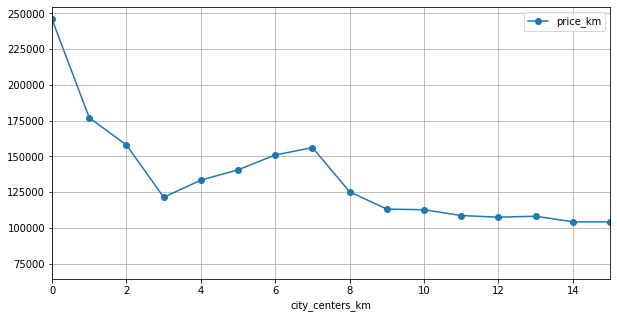

In [56]:
spb_km.plot(grid=True, style='o-', xlim=(0,15), figsize=(10, 5));

Вывод: Цена квартир находщихся рядом с центорм (до 2х км) сильно зависит от ее удаленности, так у центра квартиры значительно дороже, чем более удаленые. При удаленности квартиры от 4 км такая зависимость значительно снижается и почти не влияет на цену. 

### Общий вывод

Мы изучили архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.В ходе работы была произведена предобработка данных, пропусков и замена типов данных в таблице,были определены аномалии, уникальные значения в столбцах и устранены неявные дубликаты.Посчитали и добавили в таблицу цену одного квадратного метра жилья, вывели из даты дни недели, месяцы и года размещения объявлений, добавили категории по этажам (значения — «первый», «последний», «другой»),расстояние до центра города в километрах. Изучили следующие параметры  - общая площадь,жилая площадь,площадь кухни,цена объекта,количество комнат,высота потолков,этаж квартиры,день и месяц публикации объявления. Установили связь между разными параметрами и построили гистограммы.
На основе анализа данных пришли к выводу:
что на стоимость квартиры больше всего влияют общая площадь квартиры, в т.ч.жилая площадь и площадь кухни,количество комнат, этаж квартиры(первый этаж значительно дешевле остальных вариантов), близость к центру(чем ближе к центру, тем дороже квартира). Квартиры в Санк-Петербурге стоят дороже, чем в пригороде. Если говорить о сроке продаж,то в  основном квартиры продаются за 95 дней. Квартиры в Санк-Петербурге стоят дороже, чем в пригороде.Летом цены на квартиры несколько снижаются, а осенью и зимой - растут.